# Pandas module
- Pandas是Python語言的一個高效簡易的資料處理和分析工具，類似於Excel的程式版本
- 提供資料結構 (Series, DataFrame) 和運算操作，因此可以用Python來操作試算表內的資料。


![pandas dataframe and series](https://www.altexsoft.com/static/blog-post/2024/2/a2b6d6bd-898e-424f-98a8-50b3bdf775eb.webp)

## Import library

In [ ]:
import pandas as pd

# Series Data Structure

## 建立Series

- Series 是一個一維的資料結構, 只有一個索引
- pd.Series(資料 [, index = 索引])
  - 資料可用 List, Dict, Tuple, Numpy
  - 索引可選填，預設為整數List

In [ ]:
#用串列建立Series物件
foo = ['a', 'c', 'x', 'y']
my_ser = pd.Series(foo)
my_ser           #顯示Series
my_ser.values    #顯示值
my_ser.index     #顯示索引

In [ ]:
#用串列建立Series物件並自訂索引
company = ['聯電', '台積電', '聯發科']
stock_price = [42, 510, 694]
stock = pd.Series(stock_price, index=company)
stock
stock.values
stock.index

In [ ]:
# 用Dict建立Series
dict1 = {'Taiwan': '台北', 'US': 'New York', 'Japan': 'Tokyo'}
city = pd.Series(dict1)
city

## 讀取Series

In [ ]:
city['Taiwan']
city.iloc[0]
city.loc['US']
city.index[2]

## Lab series

(1) 根據下列表格資料，創建一個 Series (city_revenues), 回答下列問題
city | revenues
-----|---------
Amsterdam|4200
Toronto|8000
Tokyo|6500

- Toronto 的 revenues 是多少
- 第零筆資料的 revenues 是多少
- 最後一筆資料的 revenues 是多少
- 求 revenues 的 sum

(2) 根據下列表格資料，創建一個 Series (city_employee_count),回答下列問題
city | employee_count
-----|----------------
Amsterdam|5
Tokyo|8

Tokyo 是否在 city_employee_count 中

(3) 合併 city_revenues 和 city_employee_count 來產生一個 DataFrame (city_data), 回答下列問題
- 查詢 Amsterdam 的列資料
- 查詢第零橫列的列資料
- 查詢 Amsterdam 到 Tokyo的 revenue 資料



In [ ]:
import pandas as pd

city_revenues = pd.Series([4200, 8000, 6500], \
                          index=['Amsterdam', 'Toronto', 'Tokyo'])
print(city_revenues['Toronto'])
print(city_revenues.iloc[0])
print(city_revenues.iloc[-1])
print(city_revenues.sum())

city_employee_count = pd.Series([5, 8], index=['Amsterdam', 'Tokyo'])
print('Tokyo' in city_employee_count.index)

city_data = pd.DataFrame({'revenues': city_revenues,
                           'employee_count':city_employee_count})
city_data.loc['Amsterdam']
city_data.iloc[0]
city_data.loc['Amsterdam':'Tokyo']

# DataFrame Data Structure

- DataFrame 是一個二維的資料結構, 有橫列索引 (row index) 和直欄標籤 (column label)
- DataFrame 中的每一個直行可以被視為一個 Series
- pd.DataFrame(資料 [, index = 橫列索引, columns = 直欄標籤])
- 資料可用 List, Dict, Numpy, Tuple, Series.
- 橫列索引是列號，可選填，預設為整數List
- 直欄標籤是欄位名稱

## 建立DataFrame

### 用List

In [ ]:
foo=  [[65,92,78,83,70],
       [90,72,76,93,56],
       [81,85,91,89,77],
       [79,53,47,94,80],
       ]
df = pd.DataFrame(foo)
df
# print(df.values)
# print(df.index)
# 缺row index 跟column label

In [ ]:
# 設定row index 跟column label
df = pd.DataFrame(foo,
                   index=['王小明','李小美','陳大同','林小玉'],
                   columns=['國文','英文','數學','自然','社會'])
df

### 用Dict

In [ ]:
# 以column為基礎的dict
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)
df

### 了解DataFrame的結構

In [ ]:
df.shape
df.dtypes
df.describe()
df.info()

### 合併兩個DataFrame

In [ ]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df1 = pd.DataFrame(scores)
scores_others = {'體育':{'王小明':90,'李小美':93,'陳大同':95,'林小玉':80},
          '家政':{'王小明':70,'李小美':80,'陳大同':75,'林小玉':90},}

df2 = pd.DataFrame(scores_others)
df_all = pd.concat([df1, df2], axis=1)
df_all

## 讀取DataFrame資料

### `df[column]` 欄取值 

In [ ]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)
df

In [ ]:
df["自然"] #讀一個欄位
df[["國文","英文","數學"]] #讀多個欄位

### `df.loc()` 列取值

In [ ]:
df.loc["林小玉", "社會"] # int
df.loc["王小明", ["國文","社會"]] # Series
df.loc[["王小明", "李小美"], ["數學", "自然"]] # DataFrame
df.loc["王小明":"陳大同", "數學":"社會"] # DataFrame
df.loc["陳大同", :] # Series
df.loc[:"李小美", "數學":"社會"] # DataFrame
df.loc["李小美":, "數學":"社會"]

### `df.iloc()` 列ID取值

In [ ]:
df.iloc[3, 4]
df.iloc[0, [0, 4]] # Series
df.iloc[[0, 1], [2, 3]] # DataFrame
df.iloc[0:3, 2:5]
df.iloc[2, :]
df.iloc[:2, 2:5]
df.iloc[1:, 2:5]

### `head()` and `tail()`

In [ ]:
df.head(3)
df.tail(2)

### 資料排序

In [ ]:
df.sort_values(by="國文", ascending=False, inplace=True)

### 依條件讀值
- 指定欄位以條件式判斷取值
- boolean indexing: Using boolean array (series) to index select rows

In [ ]:
df["數學"] < 60 # boolean series
df[df["數學"] < 60] # dataframe
df[(df["國文"] >= 80) & (df["國文"] < 90)]
df['國文'] >= 80
df[df['國文'] >= 80]

### 讀values, index and columns

In [ ]:
df.values # Get all values, ndarray
df.index # Get all index labels
df.columns # Get all column labels

## 修改DataFrame資料

In [ ]:
name_list = ['王小明','李小美','陳大同','林小玉']
subject_list = ['國文','英文','數學','自然','社會']
score_list = [[65, 92, 78, 83, 70],
               [90, 72, 76, 93, 56],
               [81, 85, 91, 89, 77],
               [79, 53, 47, 94, 80],]

df = pd.DataFrame(score_list, index=name_list, columns=subject_list)

### `df.loc()` 列改值

In [ ]:
# modify data values
df.loc["陳大同", "社會"] = 96  # 修改cell資料
df.loc["王小明", :] = 80  # 修改row資料
df.loc['林小玉'] = [70, 50, 40, 40, 50] # 修改row資料
df

### `df[column]` 整欄改值

In [ ]:
df['數學'] = [60, 70, 80, 90]  # 修改已經存在的column'數學'的資料
df

### 更改欄位屬性

In [ ]:
# modify data types
df.dtypes
df["國文"] = df["國文"].astype('int8')
df.dtypes
# modify column name
df.rename(columns = {"英文":"外語"}, inplace=True)
df

## 新增DataFrame資料

In [ ]:
name_list = ['王小明','李小美','陳大同','林小玉']
subject_list = ['國文','英文','數學','自然','社會']
score_list = [[65, 92, 78, 83, 70],
               [90, 72, 76, 93, 56],
               [81, 85, 91, 89, 77],
               [79, 53, 47, 94, 80],]

df = pd.DataFrame(score_list, index=name_list, columns=subject_list)

In [ ]:
# 增加欄位：若欄位不存在則新增欄位，若存在則修改欄位值
df["總分"] = df["國文"] + df["英文"] + df["數學"] + df["自然"] + df["社會"] # with calculation
df["班級"] = ["甲班", "甲班", "乙班", "乙班"] # with list
df['備註'] = '吃營養午餐'  # with string
# 增加列
df.loc['陳彼得'] = [30, 35, 40, 45, 50, 200, '丙班', '不吃午餐'] # 新增一列資料
df

## 刪除 DataFrame 資料

In [ ]:
name_list = ['王小明','李小美','陳大同','林小玉']
subject_list = ['國文','英文','數學','自然','社會']
score_list = [[65, 92, 78, 83, 70],
               [90, 72, 76, 93, 56],
               [81, 85, 91, 89, 77],
               [79, 53, 47, 94, 80],]

df = pd.DataFrame(score_list, index=name_list, columns=subject_list)

In [ ]:
df.drop("王小明", axis = 0, inplace=True)
df.drop("數學", axis=1, inplace=True)
df

## 寫資料到外部檔案

In [ ]:
# 寫到CSV檔案
from pathlib import Path
target_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'scores.csv'
df.to_csv(target_csv_path, encoding='utf-8-sig')

# Use case demo (customer.csv)

## Load file

In [1]:
import pandas as pd
from pathlib import Path

source_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'customer.csv'
df = pd.read_csv(source_csv_path)  # 讀取資料
df.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


## Understand data

In [5]:
df.shape
df.dtypes
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   gender  7 non-null      object 
 3   age     12 non-null     float64
 4   area    12 non-null     object 
 5   job     15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 852.0+ bytes


## Clean data

### 查詢空值：isnull()


In [12]:
df.isnull()

,id,name,gender,age,area,job
0,False,False,False,False,False,False
1,False,False,True,True,False,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,True,True,True,False
7,False,False,True,False,True,False
8,False,False,True,False,True,False
9,False,False,True,False,False,False


In [15]:
df.isnull() # True:空值 False:非空值
df.isnull().sum() # 每個欄位有多少空值數
df.isnull().any(axis=0).sum() # 有空值的 column 有3個
df.isnull().any(axis=1).sum() # 有空值的 row 有8個 
df[df['age'].isnull()] # 顯示age欄有空值的row
df[df['age'].isnull()]

,id,name,gender,age,area,job
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產


### 空欄填值：fillna()

In [16]:
# 將age的空值填入0
dfcopy = df.copy()
dfcopy['age'] = dfcopy['age'].fillna(value=0)
dfcopy.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,0.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,0.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [17]:
# 將age的空值填入平均值
dfcopy = df.copy()
dfcopy['age'] = dfcopy['age'].fillna(value = dfcopy['age'].mean())
dfcopy.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [19]:
df[df['gender'].isnull()] # 顯示age欄有空值的row
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [20]:
# 以前一個值往下填ffill或後一個值往上填bfill
dfcopy = df.copy()
dfcopy['gender'] = dfcopy['gender'].ffill()
dfcopy['area'] = dfcopy['area'].bfill()
dfcopy

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Male,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,Male,NaN,基隆市中正區,金融業和房地產
7,1700007,吳景翔,Male,39.0,基隆市中正區,農林牧漁業
8,1700008,邱孝信,Male,39.0,基隆市中正區,金融業和房地產
9,1700009,陳明輝,Male,57.0,基隆市中正區,金融業和房地產


In [21]:
# 刪除不完整的資料
dfcopy = df.copy()
dfcopy.dropna(inplace=True)
dfcopy

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
11,1700011,許合蓉,Female,61.0,新北市三重區,住宿和餐飲業
12,1700012,武家豪,Male,53.0,新北市三重區,農林牧漁業
14,1700014,周聿綠,Female,57.0,基隆市中正區,金融業和房地產


### 去除重複資料

In [22]:
# 去除重複的記錄
dfcopy = df.copy()
dfcopy.drop_duplicates(subset='id', keep='first', inplace=True)
dfcopy

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產
10,1700010,彭郁翔,NaN,55.0,基隆市中正區,住宿和餐飲業


## Transform data

### 調整欄位值

In [23]:
dfcopy = df.copy()
dfcopy['job'] = dfcopy['job'].str.strip() # 取出字串字面值, 去除前後空白
dfcopy['job'] = dfcopy['job'].str.replace(' ', '')
dfcopy

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


### 調整欄位格式

In [24]:
# 轉換值的格式
dfcopy = df.copy()
dfcopy.dtypes
dfcopy['age'] = dfcopy['age'].fillna(value=0).astype('int8') # 先填入0再轉型
dfcopy.dtypes

id         int64
name      object
gender    object
age         int8
area      object
job       object
dtype: object

## Pack script to preprocess data

In [26]:
import pandas as pd
from pathlib import Path

# 讀取資料
source_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'customer.csv'
df = pd.read_csv(source_csv_path)  

# clean null value
df['age'] = df['age'].fillna(value = df['age'].mean())
df['gender'] = df['gender'].ffill()
df['area'] = df['area'].bfill()

# remove duplicate records
df.drop_duplicates(subset='id', keep='first', inplace=True)

# format columns
df['job'] = df['job'].str.strip()
df['job'] = df['job'].str.replace(' ', '')
df['age'] = df['age'].astype('int8')

# final cleaned data and get ready to analyze
output_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'customer_cleaned.csv'
df.to_csv(output_csv_path, encoding='utf-8-sig', index=False)

## Manipulate data

In [27]:
source_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'customer_cleaned.csv'
df = pd.read_csv(source_csv_path)
df.head()  

,id,name,gender,age,area,job
0,1700001,李國發,Male,21,新北市三重區,金融業和房地產
1,1700002,吳俊諺,Male,45,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,45,臺北市文山區,教育體育文化
3,1700004,姚鈺迪,Female,34,基隆市中正區,住宿和餐飲業
4,1700005,袁劭彥,Male,42,臺北市文山區,金融業和房地產


### Filter data

In [30]:
df[(df['gender'] == 'Female')]  # 篩選女性的資料
df[(df['gender'] == 'Male') & (df['age'] > 50)]  # 篩選男性且大於50歲的資料
df[(df['area'] == '新北市三重區') | (df['area'] == '基隆市中正區')]  # 篩選新北市三重區或基隆市中正區的資料

,id,name,gender,age,area,job
0,1700001,李國發,Male,21,新北市三重區,金融業和房地產
3,1700004,姚鈺迪,Female,34,基隆市中正區,住宿和餐飲業
5,1700006,蔡登意,Male,45,基隆市中正區,金融業和房地產
6,1700007,吳景翔,Male,39,基隆市中正區,農林牧漁業
7,1700008,邱孝信,Male,39,基隆市中正區,金融業和房地產
8,1700009,陳明輝,Male,57,基隆市中正區,金融業和房地產
9,1700010,彭郁翔,Male,55,基隆市中正區,住宿和餐飲業
10,1700011,許合蓉,Female,61,新北市三重區,住宿和餐飲業
11,1700012,武家豪,Male,53,新北市三重區,農林牧漁業
12,1700013,郭信邦,Male,48,新北市三重區,教育體育文化


### Group data

In [ ]:
df['area'].unique()
df.value_counts('area')
df.value_counts('gender')

In [37]:
df['age'].mean() # 全部年齡的平均值
df.groupby('gender')['age'].mean() # 分開男女生的平均年齡
df.groupby('area')['id'].count() # 客戶中住各區的人數

area
基隆市中正區    7
新北市三重區    4
臺北市文山區    3
Name: id, dtype: int64

In [42]:
#彙總統計：agg(), 客戶中男女生的平均年齡、最年長及最年輕的年齡
df.groupby('gender')['age'].agg(['mean', 'max', 'min'])
# df.groupby('gender')['age'].mean()
# df.groupby('gender')['age'].max()
# df.groupby('gender')['age'].min()

,mean,max,min
gender,,,
Female,50.666667,61,34
Male,44.454545,57,21


### Derive new column

In [ ]:
def get_last_name(full_name):
    return full_name[0]

df['last_name'] = df['name'].apply(get_last_name)
df

## Visualize data

### 顯示中文

In [44]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['Heiti TC'] #設定中文字型 Heiti TC

### Draw plot

In [46]:
df['job'].value_counts() # 計算各職業人數

job
金融業和房地產    7
住宿和餐飲業     3
教育體育文化     2
農林牧漁業      2
Name: count, dtype: int64

job
金融業和房地產    7
住宿和餐飲業     3
教育體育文化     2
農林牧漁業      2
Name: count, dtype: int64

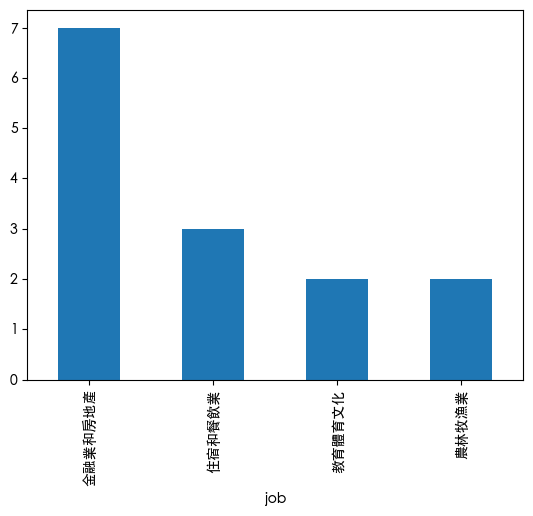

In [45]:
df_job = df['job'].value_counts() # 計算各職業人數
df_job.plot(kind='bar')
df_job

In [48]:
df['gender'].value_counts()

gender
Male      11
Female     3
Name: count, dtype: int64

gender
Male      11
Female     3
Name: count, dtype: int64

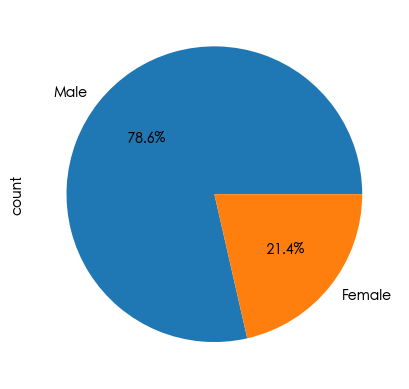

In [51]:
df_gender = df['gender'].value_counts()
df_gender.plot(kind='pie', autopct='%5.1f%%')
# df_gender.plot.pie(autopct='%5.1f%%')
df_gender


<Axes: ylabel='Frequency'>

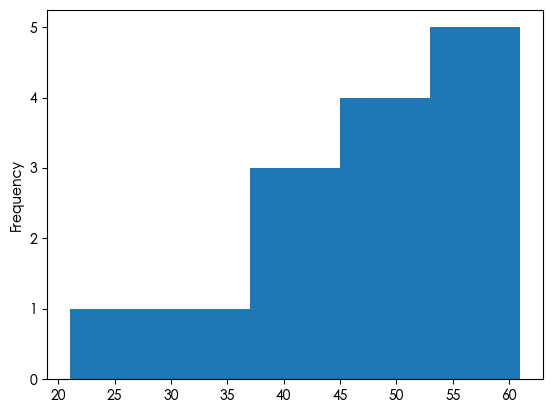

In [52]:
df['age'].plot(kind='hist', bins=5)

age    Axes(0.125,0.11;0.775x0.77)
dtype: object

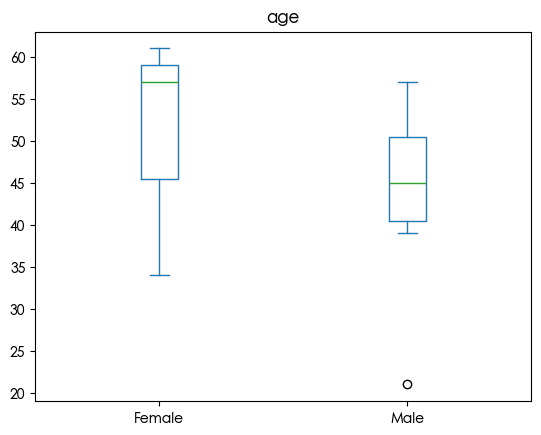

In [53]:
df.plot(kind = 'box', column='age', by='gender')